In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
with open("mnist.csv", 'r') as f:
    data = f.readlines()

In [69]:
height = 28
width = 28
depth = 1
X = np.zeros((1,height,width,depth))
y = []

In [70]:
for row in data:
    X = np.append(X, np.asfarray(row.split(',')[1:]).reshape((1,height,width, depth)), axis=0) #shape is 10001,28,28,1
    y += [int(row[0])] # shape is 10000

X = X[1:]/255.
y = np.array(y)

7


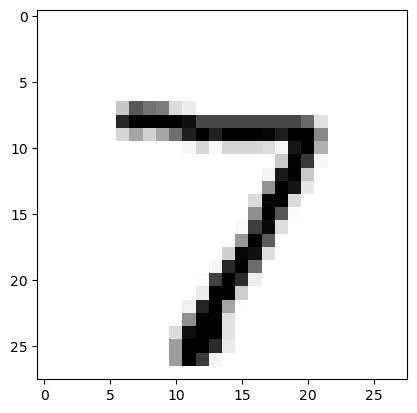

In [71]:
plt.imshow(X[0], cmap='Greys')
print(y[0])

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, metrics, optimizers, activations, regularizers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [73]:
y_one_hot = np.array(tf.one_hot(y, depth=10))

In [74]:
trainX, testX, trainY, testY = train_test_split(X, y_one_hot,test_size=0.2)

In [79]:
classifier = Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(height, width, depth)),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.5),
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(10, kernel_regularizer=regularizers.l2(0.01)),
    layers.Activation(activations.softmax)
])
classifier.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])
classifier.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 5, 5, 64)        

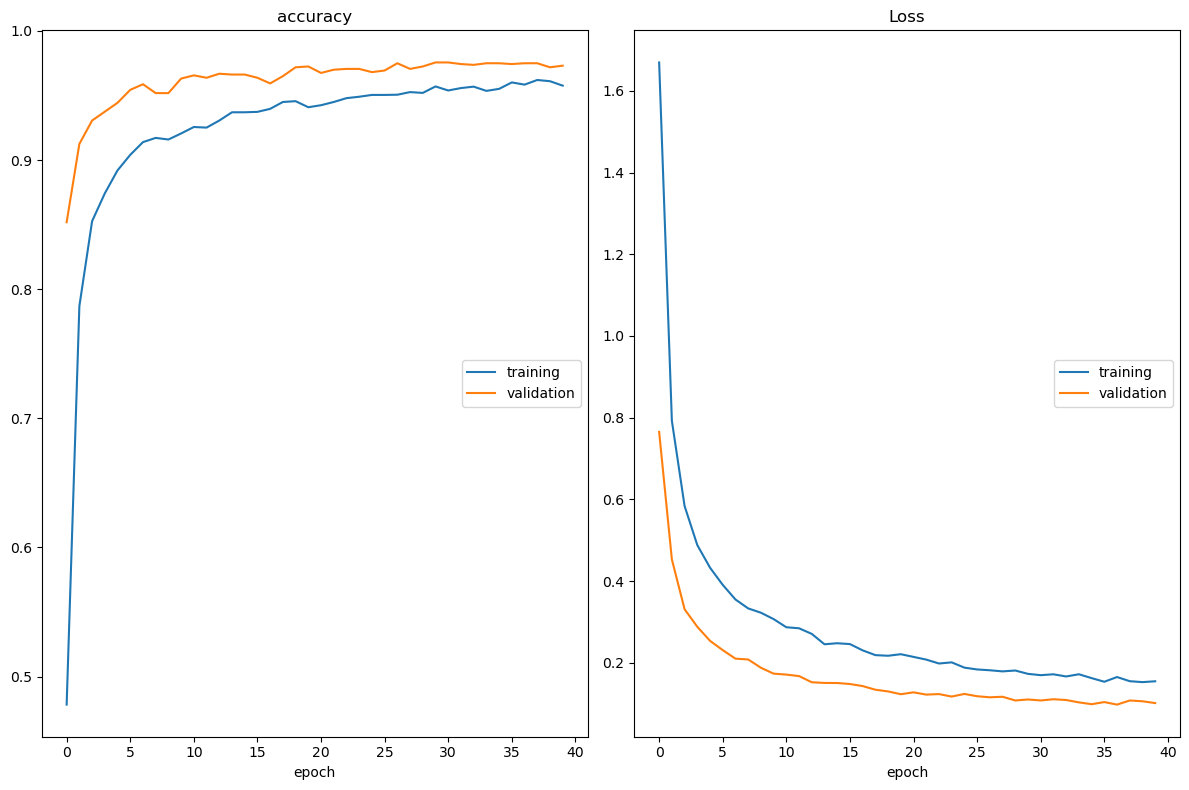

accuracy
	training         	 (min:    0.478, max:    0.962, cur:    0.958)
	validation       	 (min:    0.852, max:    0.976, cur:    0.973)
Loss
	training         	 (min:    0.153, max:    1.670, cur:    0.155)
	validation       	 (min:    0.097, max:    0.765, cur:    0.101)
200/200 [==============================] - 6s 28ms/step - loss: 0.1546 - accuracy: 0.9577 - val_loss: 0.1013 - val_accuracy: 0.9731


In [80]:
from livelossplot import PlotLossesKeras
classifier.fit(trainX, trainY, epochs=40, callbacks=[PlotLossesKeras()], verbose=1, validation_split=0.2)

63/63 [==============================] - 0s 5ms/step
Accuracy: 0.98


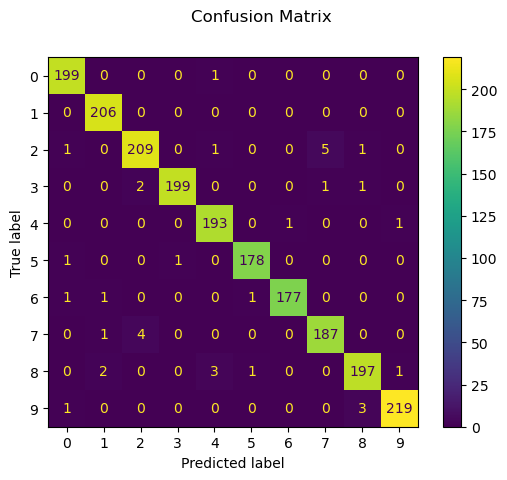

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix

Y_pred = np.argmax(classifier.predict(testX),axis=1)
Y_test = np.argmax(testY, axis=1)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.figure_.suptitle("Confusion Matrix")
plt.show()